### **Problem Statement: Analyzing Airplane Crashes: A Comprehensive Study Motivated by Recent High-Severity Incidents**

We've all seen the constant news and media headlines on recent airline crashes. In the end of 2024 and early 2025, the aviation industry has experienced severe incidents that have raised concerns about air travel safety. On December 29, 2024, Jeju Air Flight 2216 crashed during landing at Muan International Airport in South Korea, resulting in 179 fatalities. Similarly, on December 25, 2024, Azerbaijan Airlines Flight J2-8243 crashed in Kazakhstan, leading to 38 deaths
These recent incidents have not only led to significant loss of life but have also left the public shaken when choosing to utilize air travel.

What are the evident trends that can help us identify the causes and how can we stay safe?

How do certian variables such as aircraft type, and operator factor in the frequency and severity of these crashes?

Our project aims to analyze airplane crash data to identify patterns and factors. We plan to process the "Airplane_Crashes_and_Fatalities_Since_1908" dataset found on Kaggle to answer our critical questions, creating an exploratory data analysis that can either help the public have peace in mind or comprehend the dangers of air travel.






## **Loading Dataset from Github (sourced from Kaggle)**

In [ ]:
import pandas as pd

# Load dataset from GitHub
file_url = "https://raw.githubusercontent.com/Suh716/Airplane-Crash-Data-Analysis-and-EDAs/refs/heads/dev/Airplane_Crashes_and_Fatalities_Since_1908.csv"
df = pd.read_csv(file_url)

# Combine first 5 rows, an empty row, and last 5 rows
combined_df = pd.concat([df.head(), pd.DataFrame([["—"] * len(df.columns)], columns=df.columns), df.tail()])

# Display as a clean table
display(combined_df)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
0,—,—,—,—,—,—,—,—,—,—,—,—,—
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


## **Data Preprocessing and Cleaning**

First, we want to check the dataset for all the missing values. This gives us a good understanding of what percent of the dataset is usable and if we should continue.

In [ ]:
# Check basic info and missing values
df.info()
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 0 to 5267
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4860 non-null   datetime64[ns]
 1   Time          3032 non-null   object        
 2   Location      4847 non-null   object        
 3   Operator      4849 non-null   object        
 4   Flight #      1063 non-null   object        
 5   Route         3525 non-null   object        
 6   Type          4860 non-null   object        
 7   Registration  4599 non-null   object        
 8   cn/In         3885 non-null   object        
 9   Aboard        4846 non-null   float64       
 10  Fatalities    4854 non-null   float64       
 11  Ground        4845 non-null   float64       
 12  Summary       4860 non-null   object        
 13  Year          4860 non-null   int32         
 14  Month         4860 non-null   int32         
 15  Day_of_Week   4860 non-null   int32        

**Drop Duplicate Rows**

We want to get rid of all the duplicate values in our dataset to prevent distortion of our results.

In [ ]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

**Remove Unwanted Column**

Next, we decided to get rid of unneccessary columns. This will help keep our dataset clean and neat so that it's easier to work with. For this step, we chose to get rid of the following columns: Registration, Flight #, cn/In, and Ground.

Registration - knowing the registration of the plane won't really help in determining the overall dangers of air travel.

Flight # - same as the Registration column, knowing this detail won't add to the overall research.

cn/In - construction serial number, again it doesn't add value to the dataset.

Ground - this column tells us how many fatalities were on the ground. We decided to get rid of this column as we didn't see any difference between the "Fatality" column and the current one. "Fatalities" column paints the better overall image of the dangers of air travel, so we decided to stick with "Fatalities" instead of "Ground".

In [ ]:
# Drop the "Registration" column
df_cleaned = df_cleaned.drop(columns=["Registration"], errors="ignore")

# Drop the "Flight #" column
df_cleaned = df_cleaned.drop(columns=["Flight #"], errors="ignore")

# Drop the "cn/In" column
df_cleaned = df_cleaned.drop(columns=["cn/In"], errors="ignore")

# Drop the "Ground" column
df_cleaned = df_cleaned.drop(columns=["Ground"], errors="ignore")

**Drop missing values**

If more than 50% of the dataset is empty, we would drop the column that has the missing values. This would mean the column provided us with unusable data.

In [ ]:
#If more than 50% of the values are missing, drop the column
df_cleaned = df_cleaned.dropna(axis=1, thresh=len(df_cleaned) * 0.5)

**Reorder the Columns**

Here we are reordering the columns so the dataset is easier to view.

In [ ]:
#Organize the columns so it's more logical
new_column_order = ["Date", "Time", "Location", "Route", "Operator", "Type", "Aboard", "Fatalities", "Summary"]

# Reorder the columns
df_cleaned = df_cleaned[new_column_order]

**Format Date Column to datetime format**

We made sure all values in the "Date" column, are in the datetime format. This allows easier processing in the later steps when we conduct EDA.

In [ ]:
# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df['Date'], errors='coerce')

****

**Processing Common Words in Summary**



Finally, we iterated through all the summaries of the dataset to see what the most common key words are. This could give us a hint of what the cause of the crashes were.

In [ ]:
from collections import Counter

# Drop rows where 'Summary' is missing
df = df.dropna(subset=['Summary'])

# Split summaries into words and count occurrences
word_counts = Counter(" ".join(df['Summary']).lower().split())

# Filter words: remove those with length ≤ 2 and count > 1
filtered_words = {word: count for word, count in word_counts.items() if len(word) > 3 and count > 1}

# Sort by frequency (highest to lowest)
sorted_words = dict(sorted(filtered_words.items(), key=lambda x: x[1], reverse=True))

# Print result
print(sorted_words)


{'crashed': 2923, 'into': 2337, 'aircraft': 2133, 'plane': 1727, 'after': 1695, 'while': 1553, 'from': 1207, 'pilot': 935, 'flight': 864, 'with': 816, 'engine': 784, 'during': 782, 'failure': 751, 'crew': 694, 'approach': 614, 'which': 572, 'landing': 568, 'runway': 565, 'were': 555, 'taking': 533, 'struck': 508, 'cargo': 466, 'weather': 455, 'altitude': 450, 'miles': 438, 'control': 437, 'attempting': 433, 'mountain': 396, 'that': 368, 'poor': 355, 'when': 351, 'shortly': 345, 'left': 329, 'loss': 326, 'ground': 322, 'lost': 322, 'land': 313, 'right': 309, 'short': 300, 'down': 299, 'airport': 288, 'flying': 288, 'fire': 275, 'crashed.': 271, 'conditions.': 271, 'fuel': 270, 'takeoff': 270, 'failed': 265, 'airport.': 261, 'emergency': 254, 'accident': 248, 'wing': 238, 'runway.': 238, 'route.': 237, 'caused': 232, 'approach.': 229, 'below': 224, 'high': 223, 'minutes': 223, 'power': 218, 'feet': 213, 'improper': 212, 'conditions': 211, 'takeoff.': 209, 'trees': 208, 'before': 208, 'ma

# **Exploratory Data Analysis**

# **Crash Trend Over Time**

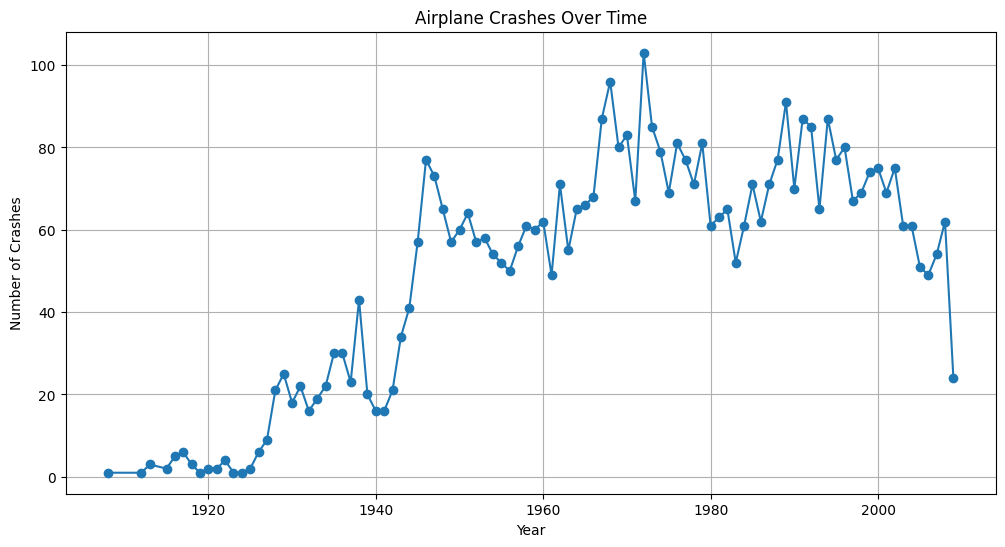

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year from the date
df['Year'] = df['Date'].dt.year

# Count crashes per year
crash_trend = df.groupby('Year').size()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(crash_trend, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.title("Airplane Crashes Over Time")
plt.grid()
plt.show()

Trend Analysis

*   Significant increase from 1900s-1970s, followed by a slight decline afterwards, which aligns with developments in aviation training, stricter regulations, and improved pilot training.
*   Sharp drop after 2000 after more devlopments in air traffic control, aircraft designs, and further regulation changes.

The sharp increase during the 1900s-1970s is most likely due to WWII and the icrease of aviation usage throughout 1920-1950. Post war, the use of comercial airlines became popular explaining the constant increase in crashes. The slight decline after 1980 could be said to be a result of implementing improved maintenance and automated safety measures.



# **Crashes by Month and Day of the Week**

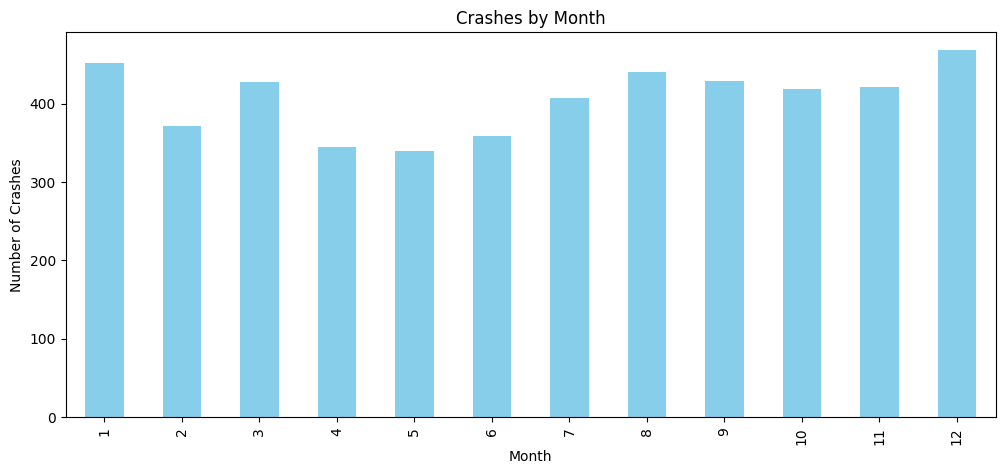

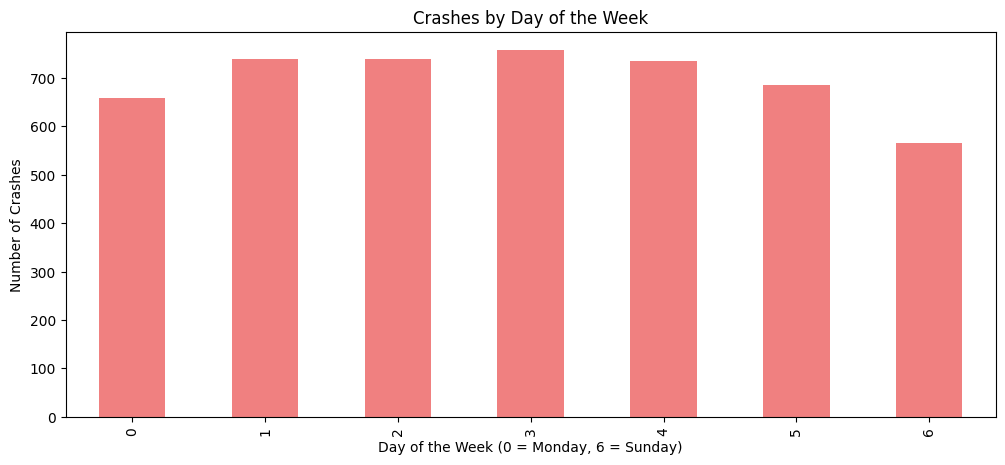

In [ ]:
# Extract Month and Day of the Week
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Plot crashes by month
plt.figure(figsize=(12, 5))
df['Month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.title("Crashes by Month")
plt.show()

# Plot crashes by day of the week
plt.figure(figsize=(12, 5))
df['Day_of_Week'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.xlabel("Day of the Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Number of Crashes")
plt.title("Crashes by Day of the Week")
plt.show()



*   January, March, August, and December have the highest number of crashes.
*   Thursday and Friday have the highest number of crashes.

The findings of this chart suggests that there are more crashes in the months that have bad weather, like snow and heavy rain. When analyzing the crashes by the days of the week, we can see that more crashes happen towards the end of the week. More people travel towards the end of the week which increases the likelyhood of crashes as there are more flights.


# **Airlines with Most Crashes**

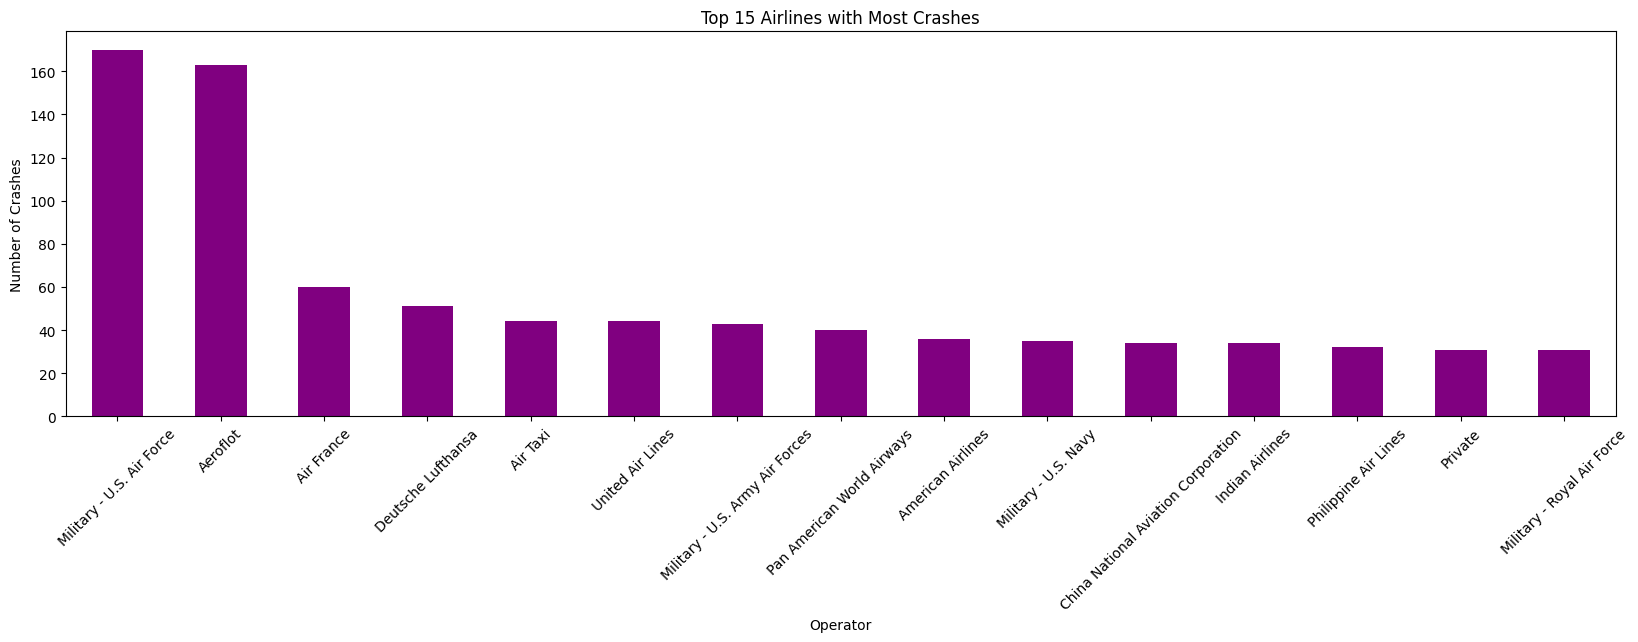

In [ ]:
# Remove blank or NaN operators
df_cleaned = df[df['Operator'].notna() & (df['Operator'].str.strip() != '')]

# Count crashes per airline
top_operators = df_cleaned['Operator'].value_counts().head(15)

# Plot
plt.figure(figsize=(20, 5))
top_operators.plot(kind='bar', color='purple')
plt.xlabel("Operator")
plt.ylabel("Number of Crashes")
plt.title("Top 15 Airlines with Most Crashes")
plt.xticks(rotation=45)
plt.show()



*   U.S. Air Force and the Russian Airline Aeroflot have had considerabley more crashes than most airlines.
*  Military and Government operated airline appear among the top 15 operators with the most crashes.

The high presence of military operators among the top entities suggests that apart from common aviation risks, these crashes could also be stemming from combat missions, training exercises, and other military operations. Aeroflot was the largest airline during the Soviet Union, handling both military and civilian flights, which explains the high rate of crashes. For future anaysis and processing, a sepearate feature can be implemented to distinguish between military and commercial operations.



# **Aircraft Model Analysis**

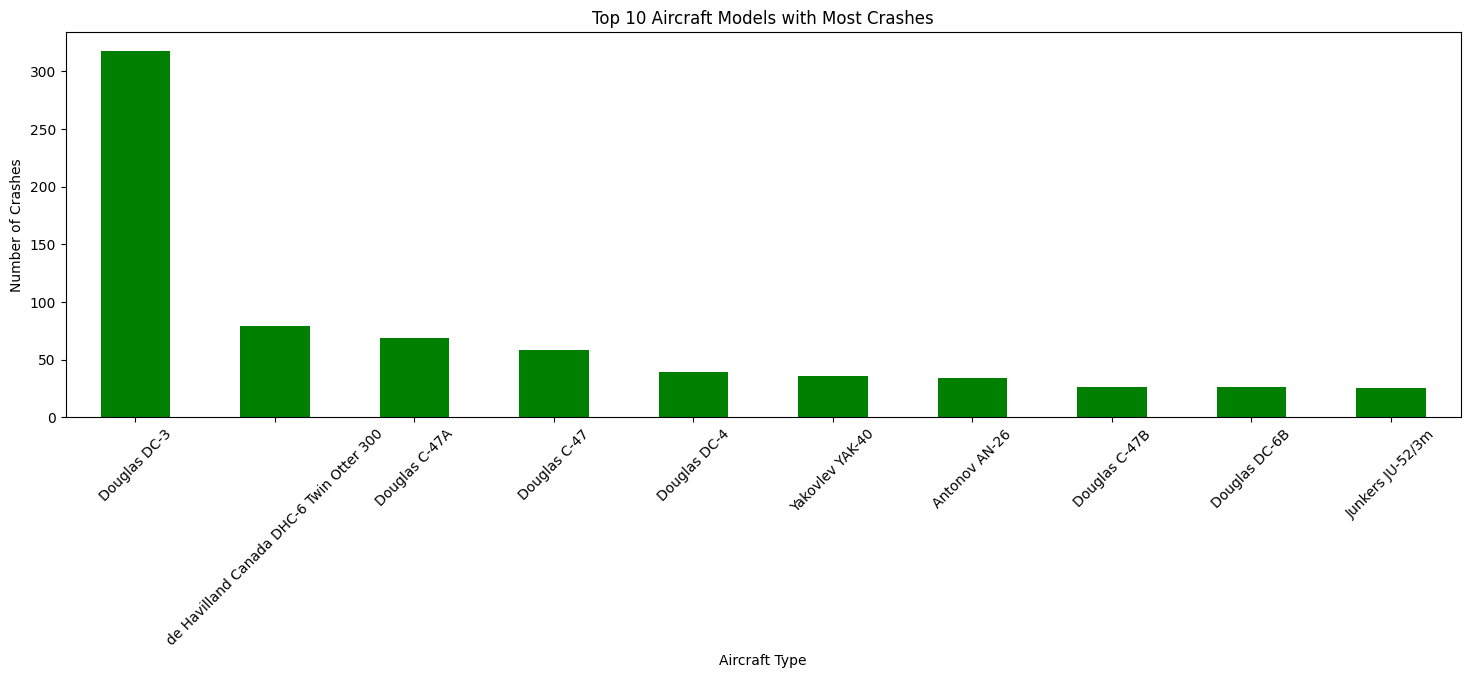

In [ ]:
# Count crashes per aircraft model
top_aircrafts = df['Type'].value_counts().head(10)

# Plot
plt.figure(figsize=(18, 5))
top_aircrafts.plot(kind='bar', color='green')
plt.xlabel("Aircraft Type")
plt.ylabel("Number of Crashes")
plt.title("Top 10 Aircraft Models with Most Crashes")
plt.xticks(rotation=45)
plt.show()




*   Douglas DC-3 recorded the most crashes than any other model with over 300 incidents.
*   Many of the mdoels in this top 10 are old aircraft models, mostly from the mid 20th century.

The Douglas DC-3 was heavily used since the 1930s for both military and civilian use, resulting in such a high recording of crashes. Most of these top aircrafts involved in incidents were extensivley used for military transport and operations. For future processing, this data could be more precisely classified under production eras to get a better understanding of how safety trends evovled. This data could also be used in downstream modeling for a predictive model as a categorical variable.



# **Fatalities per Crash**

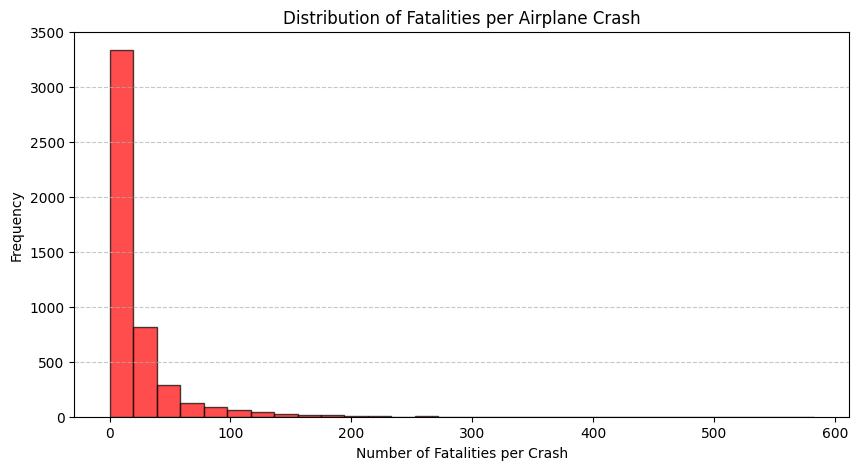

In [ ]:
import matplotlib.pyplot as plt

# Remove NaN values in the 'Fatalities' column
df_fatalities = df['Fatalities'].dropna()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df_fatalities, bins=30, color='red', edgecolor='black', alpha=0.7)
plt.xlabel("Number of Fatalities per Crash")
plt.ylabel("Frequency")
plt.title("Distribution of Fatalities per Airplane Crash")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




*   Crashes don't necessarily result in fatalities.
*   There have been a few extreme outliers where crashes resulted in amount of deaths.

Depicting the survival rate of crashes, this data suggests that these incidents allow for partial/full survivability. Few extreme cases show that there can be devastating results of a crash, likely due to high speeds or difficult rescue scenarios.



# **Passenger Load vs. Fatality Rate**

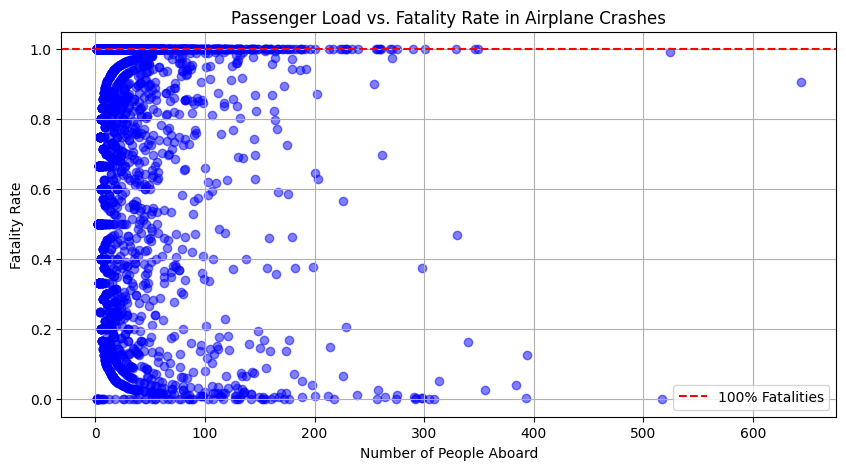

In [ ]:
import matplotlib.pyplot as plt

# calculate fatality rate
df_filtered = df[['Aboard', 'Fatalities']].dropna()
df_filtered = df_filtered[df_filtered['Aboard'] > 0]  # Avoid division by zero
df_filtered['Fatality Rate'] = df_filtered['Fatalities'] / df_filtered['Aboard']

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Aboard'], df_filtered['Fatality Rate'], alpha=0.5, color='blue')
plt.xlabel("Number of People Aboard")
plt.ylabel("Fatality Rate")
plt.title("Passenger Load vs. Fatality Rate in Airplane Crashes")
plt.axhline(y=1, color='r', linestyle='--', label='100% Fatalities')
plt.legend()
plt.grid()
plt.show()


The scatter plot reveals a strong pattern where airplane crashes often result in either complete survivability or total loss of life, with a significant number of incidents showing a 100% fatality rate, especially in larger aircraft.



*   Many crashes involve smaller aircraft, as seen from the dense clustering at lower passenger counts.
*   Crashes tend to be either fully survivable or completely fatal, with fewer cases of partial survivability.
*   Larger aircraft crashes still show instances of 100% fatalities, highlighting the severity of some accidents





# **Most Common Crash Causes (Human Error vs. Mechanical Failure)**

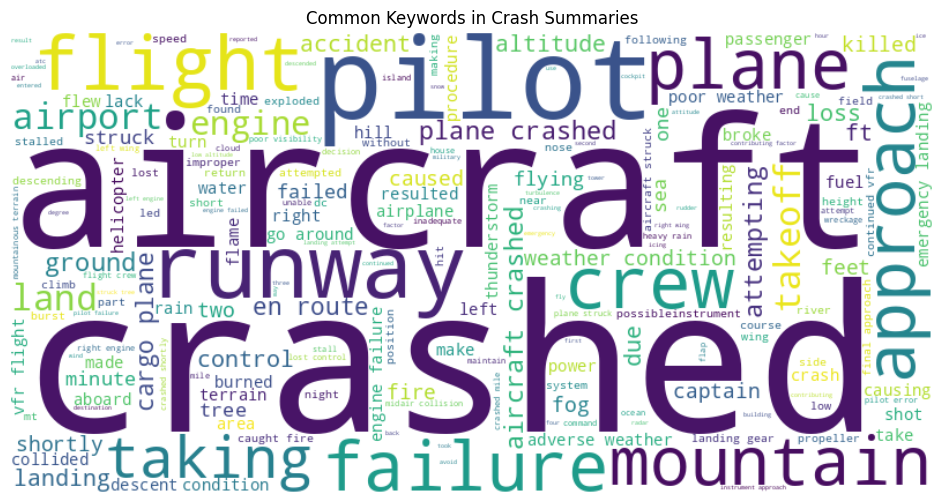

In [ ]:
from wordcloud import WordCloud

# Concatenate all summaries into one text
summary_text = " ".join(df['Summary'].dropna()).lower()

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

# Display word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Keywords in Crash Summaries")
plt.show()

The word cloud visualization provides insight into common themes in aviation crash summaries.


*   **High-risk flight phases:** Accidents frequently occur during takeoff, landing, and descent.
*   **Mechanical and environmental risks:** Common causes include engine failures, adverse weather conditions, and altitude-related issues.
* **Human factors:** Words like "pilot," "crew," and "captain" suggest the role of human decision-making.
* **Crash locations:** Terms like "mountain" and "water" indicate challenging terrains often involved in accidents.

